In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import math
from scipy import signal

## Signal 생성

In [2]:
# sampling rate
fs = 10000000 # 10MHz

# signal length
t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

# generate signal
f1 = 60 # 60Hz
signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

# generate noise signal
np.random.seed(222)
n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
signal_n = 0.2*np.sin(2*np.pi*n1*t)

# total signal
normal_signal = signal_f + signal_n

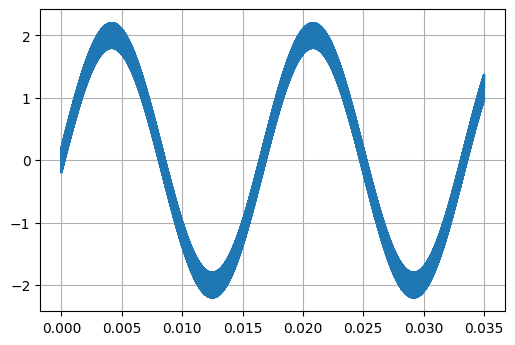

In [3]:
# visualizing signal

plt.figure(num = 1, dpi = 100)
plt.plot(t, normal_signal)
plt.grid()

## Arc 1 신호 생성

In [4]:
#  generate noise Arc 1 signal

n2 = 3000000 # 3MHz
np.random.seed(222)
random_mag_Arc1 = np.random.uniform(0.5, 0.8, 1500)
signal_Arc1 = random_mag_Arc1*np.sin(2*np.pi*n2*t[82500:84000]) # random magnitude 0.5 ~ 1

# total signal
ext_signal_Arc1 = normal_signal[82500:84000] + signal_Arc1


## Arc 2 신호 생성

In [5]:
#  generate noise Arc 2 signal

n3 = 4000000 # 4MHz

np.random.seed(333)
random_mag_Arc2 = np.random.uniform(0.8, 1.1, 1500)
signal_Arc2 = random_mag_Arc2*np.sin(2*np.pi*n3*t[82500:84000])

# total signal
ext_signal_Arc2 = normal_signal[82500:84000] + signal_Arc2

## II. Extracted signal

### i. normal signal

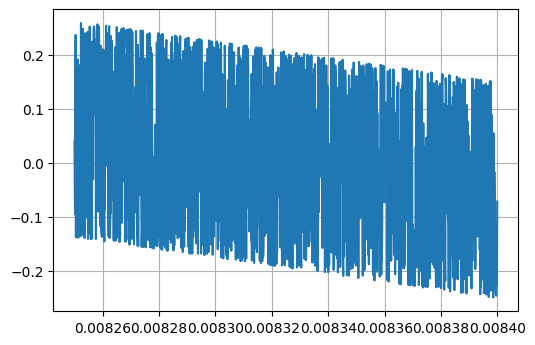

In [6]:
ext_t = t[82500:84000]
ext_signal = normal_signal[82500:84000]

plt.figure(num = 1, dpi = 100)
plt.plot(ext_t, ext_signal)
plt.grid()

### Fourier transformed Normal signal

<StemContainer object of 3 artists>

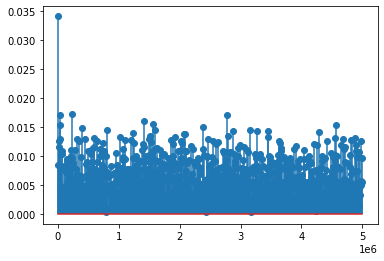

In [7]:
n = len(ext_signal)
f = np.linspace(0,fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

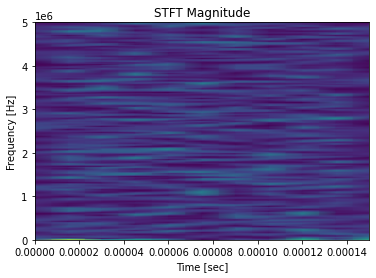

In [8]:
f, t, Zxx = signal.stft(ext_signal, fs = fs, nperseg = 300, nfft = 512)
plt.pcolormesh(t, f, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### ii. Arc 1 signal

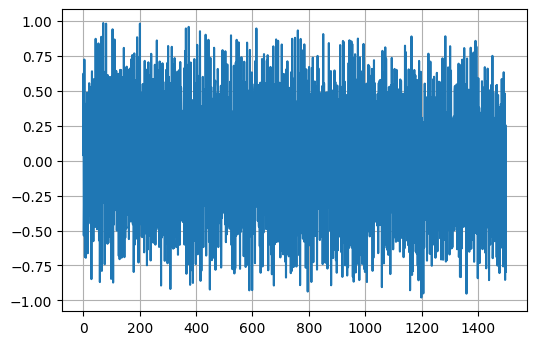

In [11]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc1)
plt.grid()

### Fourier transformed Arc 1 signal

<StemContainer object of 3 artists>

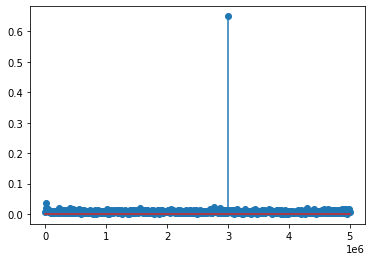

In [12]:
n = len(ext_signal_Arc1)
f = np.linspace(0, fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal_Arc1) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

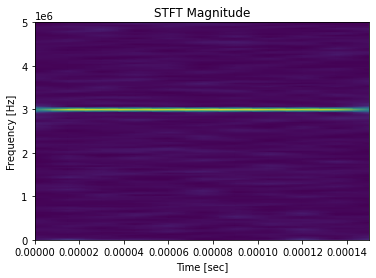

In [13]:
f_axis, t_axis, Zxx = signal.stft(ext_signal_Arc1, fs = fs, nperseg = 300)
plt.pcolormesh(t_axis, f_axis, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### iii. Arc 2 signal

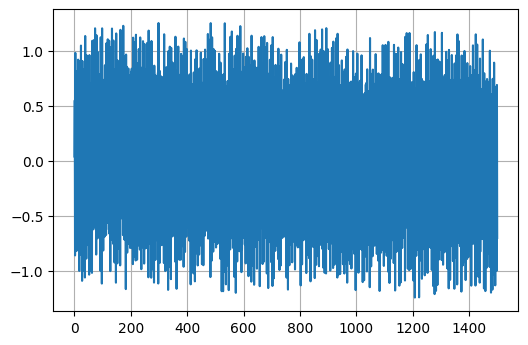

In [15]:
plt.figure(num = 1, dpi = 100)
plt.plot(ext_signal_Arc2)
plt.grid()

### Fourier transformed Arc 2 signal

<StemContainer object of 3 artists>

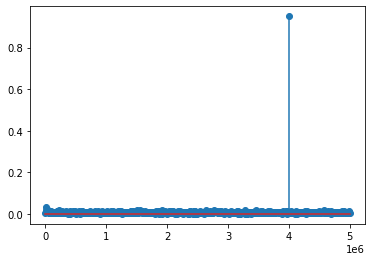

In [16]:
n = len(ext_signal_Arc2)
f = np.linspace(0, fs/2, math.trunc(n/2))

Y = np.fft.fft(ext_signal_Arc2) / n
Y = Y[range(math.trunc(n/2))]
amplitude_Hz = 2*abs(Y)

plt.stem(f, amplitude_Hz)

### Compute the Short Time Fourier Transform (STFT)

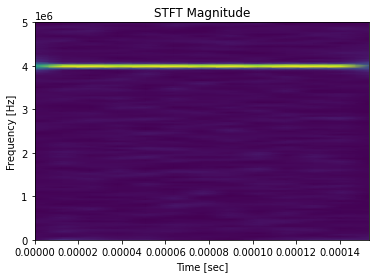

In [17]:
f_axis, t_axis, Zxx = signal.stft(ext_signal_Arc2, fs = fs)
plt.pcolormesh(t_axis, f_axis, np.abs(Zxx), shading = 'gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

### STFT DATA Features Function

In [19]:
def stft_signal(state_signal, fs):
    
    # Compute the Short Time Fourier Transform (STFT)
    f_axis, t_axis, Zxx = signal.stft(state_signal, fs = fs, nperseg = 300, nfft = 512)
    
    # 5 window division ...... f0 ~ f4로 나눠줌
    for i, j in enumerate(np.arange(0, len(t_axis)-2, 2)):
        globals()['f{0}'.format(i)] = abs(Zxx[:,j:3+j])
        
    # Max Magnitude of f0 ~ f4 ...... f0 ~ f4중에서 가장 큰 Magnitude값을 찾음.
    Max_mag = f0.max()
    
    for i in range(1, 5):
        a = globals()['f{0}'.format(i)]
        
        if Max_mag < a.max():
            Max_mag = a.max()
            
    # Max Hz of f0 ~ f4  ... f0~f4 중에서 가장 큰 Magnitude 값을 가진 주파수를 찾음.
    HZ = abs(Zxx)
    
    X, Y = np.where(HZ == Max_mag)
    Max_Hz_index = X[0]
    Max_Hz = f_axis[Max_Hz_index]
    
    # Min Magnitude of f0 ~ f4 ...... f0 ~ f4의 Max값들 중 가장 작은 Magnitude값을 찾음.
    Min_mag = f0.max()
    
    for i in range(1, 5):
        a = globals()['f{0}'.format(i)]
        # print(a.max())
        
        if Min_mag > a.max():
            Min_mag = a.max()
    
    # Min Hz of f0 ~ f4......f0~f4의 Max값들 중 가장 작은 Magnitude 값을 가진 주파수를 찾음.
    X, Y = np.where(HZ == Min_mag)
    Min_Hz_index = X[0]
    Min_Hz = f_axis[Min_Hz_index]
    
    # Max Hz - Min Hz = 변화율
    Hz_diff = Max_Hz - Min_Hz
    
    return (Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff)

### i. normal state

In [20]:
normal_Max = []
normal_Mean = []
normal_Std = []
normal_FFT_Hz_Max1 = []
normal_FFT_Mag_Max1 = []
normal_FFT_Hz_Max2 = []
normal_FFT_Mag_Max2 = []
normal_STFT_Hz_Max = []
normal_STFT_Hz_Min = []
normal_STFT_Mag_Max = []
normal_STFT_Mag_Min = []
normal_STFT_Hz_diff = []

def normal_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)

    # join signal
    n_signal = signal_f + signal_n
    
    # extract signal
    ext_signal = n_signal[82500:84000] # shoulder 부분 추출
    
    # Fourier transformed Normal signal
    n = 2048 # len(ext_signal) < 2^11 = 2048
    f = np.linspace(1000000, 1500000, math.trunc(n/2)) # 주파수 영역 값 범위 설정
    
    Y = np.fft.fft(ext_signal) / n # fft 변환 값 Y에 대입
    Y = Y[range(math.trunc(n/2))] # 대칭이므로 뒷부분 생략
    amplitude_Hz = 2*abs(Y) # 절대값 취한 후 2배해서 크기 나타냄
    
    # Short-time Fourier transformed Normal signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(ext_signal, 10000000)

    # collect data
    normal_Max.append(ext_signal.max()) # Max 값 feature 저장 
    normal_Mean.append(ext_signal.mean()) # Mean 값 feature 저장
    normal_Std.append(ext_signal.std()) # 표준편차 feature 저장
    normal_FFT_Mag_Max1.append(amplitude_Hz.max()) # FFT 변환 후 가장 큰 Magnitude
    normal_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1]) # 두 번쨰로 가장 큰 Magnitude
    normal_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()]) # 가장 큰 주파수 값
    
    # 두 번째로 큰 주파수 값을 찾기 위한 임시 변수 생성 (test)
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    normal_FFT_Hz_Max2.append(f[test[0][0]]) # 두 번째로 큰 주파수 값
    
    # STFT 변환 함수 반환값들 저장
    normal_STFT_Mag_Max.append(Max_mag)
    normal_STFT_Mag_Min.append(Min_mag)
    normal_STFT_Hz_Max.append(Max_Hz)
    normal_STFT_Hz_Min.append(Min_Hz)
    normal_STFT_Hz_diff.append(Hz_diff)

In [21]:
# update seed

for i in range(0, 20):
    normal_signal(i)
    
# create DataFrame
normal_state = pd.DataFrame({"Max" : normal_Max,
                            "Mean" : normal_Mean,
                            "Std" : normal_Std,
                            "FFT_Mag1" : normal_FFT_Mag_Max1,
                            "FFT_Hz1" : normal_FFT_Hz_Max1,
                            "FFT_Mag2" : normal_FFT_Mag_Max2,
                            "FFT_Hz2" : normal_FFT_Hz_Max2,
                            "STFT_Mag1" : normal_STFT_Mag_Max,
                            "STFT_Hz1" : normal_STFT_Hz_Max,
                            "STFT_Mag2" : normal_STFT_Mag_Min,
                            "STFT_Hz2" : normal_STFT_Hz_Min,
                            "STFT_diff" : normal_STFT_Hz_diff})

In [22]:
normal_state

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,0.259652,0.005268,0.144799,0.024356,1.000489e+06,0.015152,1.000978e+06,0.048556,0.0,0.023619,761718.75,-761718.75
1,0.262632,0.003340,0.144802,0.035353,1.000489e+06,0.012606,1.334800e+06,0.058553,0.0,0.029802,3515625.00,-3515625.00
2,0.257019,0.010629,0.148559,0.026264,1.000489e+06,0.018762,1.000978e+06,0.069447,0.0,0.026188,2714843.75,-2714843.75
3,0.262077,0.003400,0.144927,0.026863,1.000489e+06,0.015115,1.001466e+06,0.052904,0.0,0.024655,957031.25,-957031.25
4,0.260850,0.000353,0.145007,0.024292,1.000489e+06,0.015182,1.001466e+06,0.055566,0.0,0.024883,0.00,0.00
5,0.262190,0.008453,0.141116,0.018601,1.000489e+06,0.015568,1.412023e+06,0.035023,0.0,0.023246,2500000.00,-2500000.00
6,0.262553,0.010182,0.142349,0.020646,1.000489e+06,0.014916,1.000000e+06,0.046898,0.0,0.023190,0.00,0.00
7,0.261760,0.006188,0.144682,0.028274,1.000489e+06,0.014798,1.000978e+06,0.055833,0.0,0.026207,449218.75,-449218.75
8,0.260576,0.000541,0.141563,0.021528,1.000489e+06,0.013527,1.279081e+06,0.052264,0.0,0.023885,0.00,0.00
9,0.261007,0.005081,0.145664,0.027499,1.000489e+06,0.014268,1.231672e+06,0.055898,0.0,0.027149,4824218.75,-4824218.75


### ii. Arc 1 state

In [23]:
arc1_Max = []
arc1_Mean = []
arc1_Std = []
arc1_FFT_Hz_Max1 = []
arc1_FFT_Mag_Max1 = []
arc1_FFT_Hz_Max2 = []
arc1_FFT_Mag_Max2 = []
arc1_STFT_Hz_Max = []
arc1_STFT_Hz_Min = []
arc1_STFT_Mag_Max = []
arc1_STFT_Mag_Min = []
arc1_STFT_Hz_diff = []

def arc1_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)
    
    # generate noise Arc 1 signal
    n2 = 3000000 # 3MHz
    np.random.seed(i*10)
    random_mag_Arc1 = np.random.uniform(0.5, 0.8, 1500)
    signal_Arc1 = random_mag_Arc1*np.sin(2*np.pi*n2*t[82500:84000]) # random magnitude 0.5 ~ 1

    # add up signal
    n_signal = signal_f + signal_n
    signal_Arc1 = n_signal[82500:84000] + signal_Arc1
    
    # Fourier transformed Arc1 signal
    n = 2048 # len(signal_Arc1)
    f = np.linspace(1000000, 3000000, math.trunc(n/2))
    
    Y = np.fft.fft(signal_Arc1) / n
    Y = Y[range(math.trunc(n/2))]
    amplitude_Hz = 2*abs(Y)
    
    # Short-time Fourier transformed Arc1 signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(signal_Arc1, 10000000)
    
    # collect data
    arc1_Max.append(signal_Arc1.max())
    arc1_Mean.append(signal_Arc1.mean())
    arc1_Std.append(signal_Arc1.std())
    arc1_FFT_Mag_Max1.append(amplitude_Hz.max())
    arc1_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1])
    arc1_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()])
    
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    arc1_FFT_Hz_Max2.append(f[test[0][0]])
    
    arc1_STFT_Mag_Max.append(Max_mag)
    arc1_STFT_Mag_Min.append(Min_mag)
    arc1_STFT_Hz_Max.append(Max_Hz)
    arc1_STFT_Hz_Min.append(Min_Hz)
    arc1_STFT_Hz_diff.append(Hz_diff)

In [24]:
# update seed

for i in range(100, 120):
    arc1_signal(i)
    
# create DataFrame
arc1_state = pd.DataFrame({"Max" : arc1_Max,
                            "Mean" : arc1_Mean,
                            "Std" : arc1_Std,
                            "FFT_Mag1" : arc1_FFT_Mag_Max1,
                            "FFT_Hz1" : arc1_FFT_Hz_Max1,
                            "FFT_Mag2" : arc1_FFT_Mag_Max2,
                            "FFT_Hz2" : arc1_FFT_Hz_Max2,
                          "STFT_Mag1" : arc1_STFT_Mag_Max,
                            "STFT_Hz1" : arc1_STFT_Hz_Max,
                            "STFT_Mag2" : arc1_STFT_Mag_Min,
                            "STFT_Hz2" : arc1_STFT_Hz_Min,
                            "STFT_diff" : arc1_STFT_Hz_diff})

In [25]:
arc1_state

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,1.016945,0.004122,0.483941,0.474313,1.879765e+06,0.022879,1.001955e+06,0.317100,3007812.5,0.311374,3007812.5,0.0
1,0.991839,0.007655,0.489547,0.478465,1.879765e+06,0.023656,1.001955e+06,0.330818,3007812.5,0.319049,3007812.5,0.0
2,0.988252,0.010684,0.482905,0.473697,1.879765e+06,0.023862,1.001955e+06,0.327171,3007812.5,0.308510,3007812.5,0.0
3,1.011263,0.006567,0.490740,0.480957,1.879765e+06,0.027995,1.001955e+06,0.327179,3007812.5,0.316119,3007812.5,0.0
4,0.976473,0.003634,0.476617,0.466432,1.879765e+06,0.028484,1.001955e+06,0.315933,3007812.5,0.307477,3007812.5,0.0
5,0.994581,0.007733,0.484520,0.475250,1.879765e+06,0.030298,1.001955e+06,0.323625,3007812.5,0.321563,3007812.5,0.0
6,0.988015,0.005322,0.480693,0.470188,1.879765e+06,0.020750,1.001955e+06,0.318603,3007812.5,0.293976,3007812.5,0.0
7,0.970209,0.001964,0.483191,0.473368,1.879765e+06,0.027013,1.001955e+06,0.326601,3007812.5,0.304716,3007812.5,0.0
8,0.984708,-0.001800,0.487661,0.478150,1.879765e+06,0.022902,1.001955e+06,0.322821,3007812.5,0.313899,3007812.5,0.0
9,0.998145,0.012336,0.488535,0.479185,1.879765e+06,0.029623,1.001955e+06,0.325531,3007812.5,0.312494,3007812.5,0.0


### iii. Arc2 state

In [26]:
arc2_Max = []
arc2_Mean = []
arc2_Std = []
arc2_FFT_Hz_Max1 = []
arc2_FFT_Mag_Max1 = []
arc2_FFT_Hz_Max2 = []
arc2_FFT_Mag_Max2 = []
arc2_STFT_Hz_Max = []
arc2_STFT_Hz_Min = []
arc2_STFT_Mag_Max = []
arc2_STFT_Mag_Min = []
arc2_STFT_Hz_diff = []


def arc2_signal(i):
    # sampling rate
    fs = 10000000 # 10MHz
    
    # signal length
    t = np.arange(0, 0.035, 1 / fs) # s, sampling interval, time array

    # generate signal
    f1 = 60 # 60Hz
    signal_f = 2*np.sin(2*np.pi*f1*t)  # amplitude = 2

    # generate noise signal
    np.random.seed(i)
    n1 = np.random.uniform(1000000, 1500000, len(t)) # 1MHz ~ 1.5 MHz
    signal_n = 0.2*np.sin(2*np.pi*n1*t)
    
    # generate noise Arc 2 signal
    n2 = 4000000 # 4MHz
    np.random.seed(i*20)
    random_mag_Arc2 = np.random.uniform(0.8, 1.1, 1500)
    signal_Arc2 = random_mag_Arc2*np.sin(2*np.pi*n2*t[82500:84000])

    # add up signal
    n_signal = signal_f + signal_n
    signal_Arc2 = n_signal[82500:84000] + signal_Arc2
    
    # Fourier transformed Arc2 signal
    n = 2048 # len(signal_Arc2)
    f = np.linspace(1000000, 5000000, math.trunc(n/2))
    
    Y = np.fft.fft(signal_Arc2) / n
    Y = Y[range(math.trunc(n/2))]
    amplitude_Hz = 2*abs(Y)
    
    # Short-time Fourier transformed Arc1 signal
    Max_mag, Min_mag, Max_Hz, Min_Hz, Hz_diff = stft_signal(signal_Arc2, 10000000)
    
    # collect data
    arc2_Max.append(signal_Arc2.max())
    arc2_Mean.append(signal_Arc2.mean())
    arc2_Std.append(signal_Arc2.std())
    arc2_FFT_Mag_Max1.append(amplitude_Hz.max())
    arc2_FFT_Mag_Max2.append(sorted(amplitude_Hz, reverse = True)[1])
    arc2_FFT_Hz_Max1.append(f[amplitude_Hz.argmax()])
    
    test = np.where(amplitude_Hz == sorted(amplitude_Hz, reverse = True)[1])
    test = list(test)
    arc2_FFT_Hz_Max2.append(f[test[0][0]])
    
    arc2_STFT_Mag_Max.append(Max_mag)
    arc2_STFT_Mag_Min.append(Min_mag)
    arc2_STFT_Hz_Max.append(Max_Hz)
    arc2_STFT_Hz_Min.append(Min_Hz)
    arc2_STFT_Hz_diff.append(Hz_diff)

In [27]:
# update seed

for i in range(100, 120):
    arc2_signal(i)
    
# create DataFrame
arc2_state = pd.DataFrame({"Max" : arc2_Max,
                            "Mean" : arc2_Mean,
                            "Std" : arc2_Std,
                            "FFT_Mag1" : arc2_FFT_Mag_Max1,
                            "FFT_Hz1" : arc2_FFT_Hz_Max1,
                            "FFT_Mag2" : arc2_FFT_Mag_Max2,
                            "FFT_Hz2" : arc2_FFT_Hz_Max2,
                          "STFT_Mag1" : arc2_STFT_Mag_Max,
                            "STFT_Hz1" : arc2_STFT_Hz_Max,
                            "STFT_Mag2" : arc2_STFT_Mag_Min,
                            "STFT_Hz2" : arc2_STFT_Hz_Min,
                            "STFT_diff" : arc2_STFT_Hz_diff})

In [28]:
arc2_state

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff
0,1.277591,0.001539,0.689353,0.695348,3.346041e+06,0.695348,3.346041e+06,0.485570,4003906.25,0.467699,4003906.25,0.0
1,1.263439,0.004896,0.690030,0.695437,3.346041e+06,0.695437,3.346041e+06,0.483087,4003906.25,0.472132,4003906.25,0.0
2,1.288785,0.005867,0.690514,0.697151,3.346041e+06,0.697151,3.346041e+06,0.480549,4003906.25,0.475631,4003906.25,0.0
3,1.289243,0.008866,0.692452,0.698117,3.346041e+06,0.698117,3.346041e+06,0.485740,4003906.25,0.472995,4003906.25,0.0
4,1.298359,0.006538,0.681221,0.686916,3.346041e+06,0.686916,3.346041e+06,0.476352,4003906.25,0.463547,4003906.25,0.0
5,1.292276,0.010361,0.687878,0.693253,3.346041e+06,0.693253,3.346041e+06,0.479244,4003906.25,0.463372,4003906.25,0.0
6,1.287772,0.006434,0.692255,0.698265,3.346041e+06,0.698265,3.346041e+06,0.485753,4003906.25,0.467963,4003906.25,0.0
7,1.241055,0.001438,0.683310,0.689397,3.346041e+06,0.689397,3.346041e+06,0.473944,4003906.25,0.469808,4003906.25,0.0
8,1.278141,-0.000254,0.683055,0.688854,3.346041e+06,0.688854,3.346041e+06,0.473424,4003906.25,0.464221,4003906.25,0.0
9,1.305992,0.010176,0.691256,0.696904,3.346041e+06,0.696904,3.346041e+06,0.480567,4003906.25,0.473534,4003906.25,0.0


### iv. Data merge

In [29]:
Arc_Fault = pd.concat([normal_state, arc1_state, arc2_state], ignore_index = True)

In [30]:
Arc_Fault.insert(12, "label", 1, True)
Arc_Fault.label.iloc[0:20] = 0

c:\users\user\anaconda3\envs\etri\lib\site-packages\pandas\core\indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
Arc_Fault

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff,label
0,0.259652,0.005268,0.144799,0.024356,1.000489e+06,0.015152,1.000978e+06,0.048556,0.00,0.023619,761718.75,-761718.75,0
1,0.262632,0.003340,0.144802,0.035353,1.000489e+06,0.012606,1.334800e+06,0.058553,0.00,0.029802,3515625.00,-3515625.00,0
2,0.257019,0.010629,0.148559,0.026264,1.000489e+06,0.018762,1.000978e+06,0.069447,0.00,0.026188,2714843.75,-2714843.75,0
3,0.262077,0.003400,0.144927,0.026863,1.000489e+06,0.015115,1.001466e+06,0.052904,0.00,0.024655,957031.25,-957031.25,0
4,0.260850,0.000353,0.145007,0.024292,1.000489e+06,0.015182,1.001466e+06,0.055566,0.00,0.024883,0.00,0.00,0
5,0.262190,0.008453,0.141116,0.018601,1.000489e+06,0.015568,1.412023e+06,0.035023,0.00,0.023246,2500000.00,-2500000.00,0
6,0.262553,0.010182,0.142349,0.020646,1.000489e+06,0.014916,1.000000e+06,0.046898,0.00,0.023190,0.00,0.00,0
7,0.261760,0.006188,0.144682,0.028274,1.000489e+06,0.014798,1.000978e+06,0.055833,0.00,0.026207,449218.75,-449218.75,0
8,0.260576,0.000541,0.141563,0.021528,1.000489e+06,0.013527,1.279081e+06,0.052264,0.00,0.023885,0.00,0.00,0
9,0.261007,0.005081,0.145664,0.027499,1.000489e+06,0.014268,1.231672e+06,0.055898,0.00,0.027149,4824218.75,-4824218.75,0


In [32]:
# 데이터 파일 csv 형식으로 저장.
# Arc_Fault.to_csv('Arc_Data.csv', index = False)

## Correlation Analysis

In [33]:
Arc_Fault.corr()

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff,label
Max,1.000000,-0.011184,0.994477,0.998309,0.925529,0.729357,0.676753,0.994888,0.998799,0.996356,0.721921,0.587711,0.960658
Mean,-0.011184,1.000000,-0.021384,-0.019820,-0.033867,-0.042459,-0.042849,-0.016540,-0.015450,-0.017531,0.094667,-0.131373,-0.003552
Std,0.994477,-0.021384,1.000000,0.998617,0.958805,0.794056,0.746038,0.999435,0.990326,0.999436,0.729048,0.567415,0.928720
FFT_Mag1,0.998309,-0.019820,0.998617,1.000000,0.942741,0.761299,0.710877,0.998717,0.996175,0.999424,0.727668,0.577336,0.946773
FFT_Hz1,0.925529,-0.033867,0.958805,0.942741,1.000000,0.933797,0.902394,0.954889,0.910697,0.950961,0.706016,0.480671,0.785623
FFT_Mag2,0.729357,-0.042459,0.794056,0.761299,0.933797,1.000000,0.992591,0.786408,0.702704,0.777974,0.595369,0.312429,0.512385
FFT_Hz2,0.676753,-0.042849,0.746038,0.710877,0.902394,0.992591,1.000000,0.736890,0.648423,0.729175,0.548703,0.289077,0.449247
STFT_Mag1,0.994888,-0.016540,0.999435,0.998717,0.954889,0.786408,0.736890,1.000000,0.991356,0.999181,0.737366,0.559270,0.932527
STFT_Hz1,0.998799,-0.015450,0.990326,0.996175,0.910697,0.702704,0.648423,0.991356,1.000000,0.993299,0.717860,0.594113,0.971037
STFT_Mag2,0.996356,-0.017531,0.999436,0.999424,0.950961,0.777974,0.729175,0.999181,0.993299,1.000000,0.728412,0.572382,0.937710


Data Feature 결과
Max, Std, FFT_Mag1, FFT_Hz1, STFT_Mag1,2, STFT_Hz1,2, STFT_diff 추출

<AxesSubplot:>

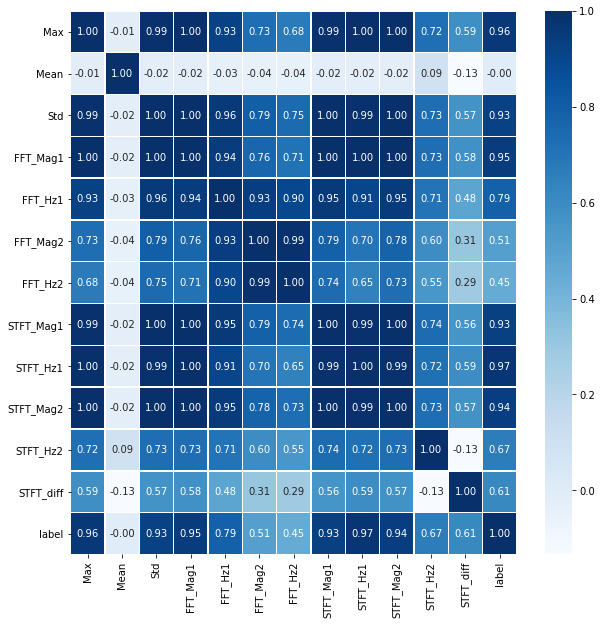

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data = Arc_Fault.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 다중공선성 (Multicollinearity) 확인

In [35]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Arc_Fault.head()

,Max,Mean,Std,FFT_Mag1,FFT_Hz1,FFT_Mag2,FFT_Hz2,STFT_Mag1,STFT_Hz1,STFT_Mag2,STFT_Hz2,STFT_diff,label
0,0.259652,0.005268,0.144799,0.024356,1.000489e+06,0.015152,1.000978e+06,0.048556,0.0,0.023619,761718.75,-761718.75,0
1,0.262632,0.003340,0.144802,0.035353,1.000489e+06,0.012606,1.334800e+06,0.058553,0.0,0.029802,3515625.00,-3515625.00,0
2,0.257019,0.010629,0.148559,0.026264,1.000489e+06,0.018762,1.000978e+06,0.069447,0.0,0.026188,2714843.75,-2714843.75,0
3,0.262077,0.003400,0.144927,0.026863,1.000489e+06,0.015115,1.001466e+06,0.052904,0.0,0.024655,957031.25,-957031.25,0
4,0.260850,0.000353,0.145007,0.024292,1.000489e+06,0.015182,1.001466e+06,0.055566,0.0,0.024883,0.00,0.00,0


### VIF(Variance Inflactions Factors)

In [36]:
y, X = dmatrices('label ~ Max + Mean + Std + FFT_Mag1 + FFT_Hz1 + FFT_Mag2 + \
FFT_Hz2 + STFT_Mag1 + STFT_Hz1 + STFT_Mag2 + STFT_Hz2 + STFT_diff',
                 Arc_Fault, return_type = 'dataframe')

vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

c:\users\user\anaconda3\envs\etri\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF Factor,features
0,4.508941e+04,Intercept
1,1.277305e+03,Max
2,1.241097e+00,Mean
3,2.850900e+04,Std
4,3.106726e+04,FFT_Mag1
5,2.685134e+04,FFT_Hz1
6,1.042672e+04,FFT_Mag2
7,1.386023e+02,FFT_Hz2
8,1.559035e+03,STFT_Mag1
9,inf,STFT_Hz1


In [37]:
# 임의로 features 제거

y, X = dmatrices('label ~ Max + Mean + Std + FFT_Mag1 + FFT_Hz1 + FFT_Mag2 + \
FFT_Hz2 + STFT_Mag1 + STFT_Mag2 ',
                 Arc_Fault, return_type = 'dataframe')

vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,14846.919060,Intercept
1,1171.856815,Max
2,1.186008,Mean
3,25134.208559,Std
4,28566.735032,FFT_Mag1
5,6817.856268,FFT_Hz1
6,2205.141373,FFT_Mag2
7,130.797705,FFT_Hz2
8,1377.339347,STFT_Mag1
9,2519.779336,STFT_Mag2


## PCA - Dimensionality Reduction

### i. StandardScaler

In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [39]:
features = ['Max', 'Mean', 'Std', 'FFT_Mag1', 'FFT_Hz1', 'FFT_Mag2', 'FFT_Hz2',
            'STFT_Mag1', 'STFT_Hz1', 'STFT_Mag2', 'STFT_Hz2', 'STFT_diff']

# Separating out the features
x = Arc_Fault.loc[:, features].values
# Separating out the target
y = Arc_Fault.loc[:, ['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

### ii. 2D PCA

In [40]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

principalDf.head()

,PC1,PC2
0,3.832851,-0.587314
1,3.626176,1.781922
2,3.738076,1.868009
3,3.808323,-0.631981
4,3.826576,-1.886765


In [41]:
ratio = pca.explained_variance_ratio_
ratio

array([0.75076797, 0.10574587])

In [42]:
sum(pca.explained_variance_ratio_)

0.8565138414103959

c:\users\user\anaconda3\envs\etri\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,V_ration
PC1,0.750768
PC2,0.105746


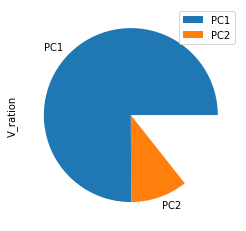

In [43]:
df_v = pd.DataFrame(ratio, index = ['PC1', 'PC2'], columns = ['V_ration'])
df_v.plot.pie(y = 'V_ration')
df_v

In [44]:
finalDf = pd.concat([principalDf, Arc_Fault[['label']]], axis = 1)

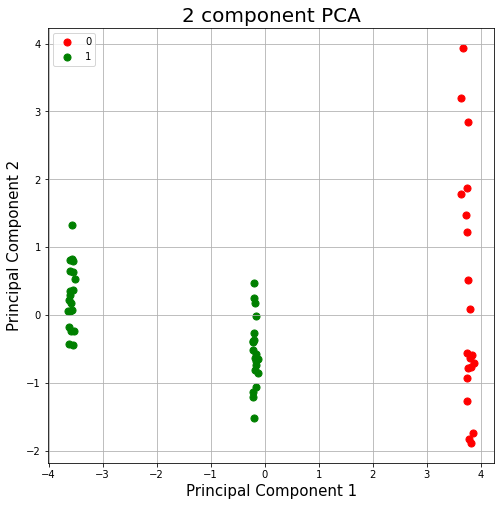

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### iii. 3D PCA

In [46]:
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

principalDF.head()

,PC1,PC2,PC3
0,3.832851,-0.587314,-0.295493
1,3.626176,1.781922,-1.534606
2,3.738076,1.868009,0.243137
3,3.808323,-0.631981,-0.717979
4,3.826576,-1.886765,-1.062457


In [47]:
ratio = pca.explained_variance_ratio_
ratio

array([0.75076797, 0.10574587, 0.08130413])

In [48]:
sum(pca.explained_variance_ratio_)

0.9378179712504852

c:\users\user\anaconda3\envs\etri\lib\site-packages\pandas\plotting\_matplotlib\core.py:1600: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


,V_ration
PC1,0.750768
PC2,0.105746
PC3,0.081304


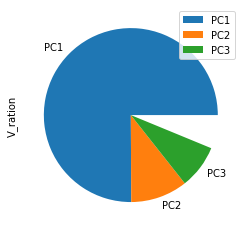

In [49]:
df_v = pd.DataFrame(ratio, index = ['PC1', 'PC2', 'PC3'], columns = ['V_ration'])
df_v.plot.pie(y = 'V_ration')
df_v

In [50]:
finalDf = pd.concat([principalDF, Arc_Fault[['label']]], axis = 1)
finalDf

,PC1,PC2,PC3,label
0,3.832851,-0.587314,-0.295493,0
1,3.626176,1.781922,-1.534606,0
2,3.738076,1.868009,0.243137,0
3,3.808323,-0.631981,-0.717979,0
4,3.826576,-1.886765,-1.062457,0
5,3.724592,1.474861,-0.283344,0
6,3.874780,-0.703713,0.893021,0
7,3.819590,-0.769978,-0.019402,0
8,3.775482,-1.821670,-1.118967,0
9,3.637041,3.194570,-1.520322,0


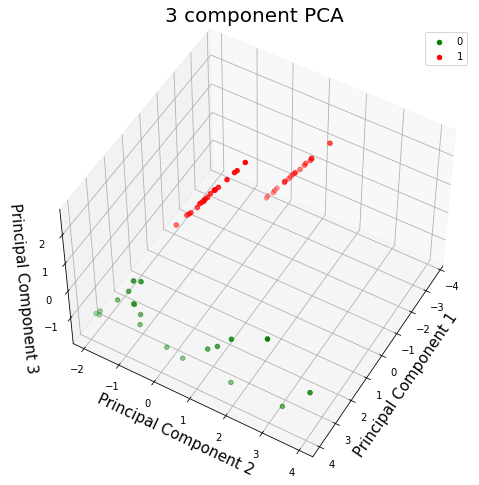

In [51]:
# pca 그리기
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1, projection="3d") 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = [0, 1] # y class에 맞춰서 변경
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , finalDf.loc[indicesToKeep, 'PC3']
               , c = color)

ax.view_init(50,30) 
ax.legend(targets)
ax.grid()

### iv. PCA 차원축소 후 다중공선성 검사

In [52]:
y, X = dmatrices('label ~ PC1 + PC2 + PC3',
                 finalDf, return_type = 'dataframe')

vif= pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,1.0,Intercept
1,1.0,PC1
2,1.0,PC2
3,1.0,PC3


### v. PCA 후 상관관계 분석

In [81]:
finalDf.corr()

,PC1,PC2,PC3,label
PC1,1.000000e+00,1.313422e-17,-2.047116e-16,-0.886667
PC2,1.313422e-17,1.000000e+00,2.197226e-16,-0.164469
PC3,-2.047116e-16,2.197226e-16,1.000000e+00,0.287099
label,-8.866671e-01,-1.644693e-01,2.870986e-01,1.000000


## SVM(Support Vector Machine) 분류 - PCA(X)

In [53]:
Arc_Fault.shape

(60, 13)

In [54]:
Arc_Fault.info()
Arc_Fault.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Max        60 non-null     float64
 1   Mean       60 non-null     float64
 2   Std        60 non-null     float64
 3   FFT_Mag1   60 non-null     float64
 4   FFT_Hz1    60 non-null     float64
 5   FFT_Mag2   60 non-null     float64
 6   FFT_Hz2    60 non-null     float64
 7   STFT_Mag1  60 non-null     float64
 8   STFT_Hz1   60 non-null     float64
 9   STFT_Mag2  60 non-null     float64
 10  STFT_Hz2   60 non-null     float64
 11  STFT_diff  60 non-null     float64
 12  label      60 non-null     int64  
dtypes: float64(12), int64(1)
memory usage: 6.2 KB


1    40
0    20
Name: label, dtype: int64

In [55]:
X = Arc_Fault.iloc[:, :-1]
y = Arc_Fault.iloc[:, -1]

### SVM 선형분리 학습

In [56]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'

svm_clf = svm.SVC(kernel = 'linear')

# Cross-validation

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv = 5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  1.0


### SVM 비선형분리 학습

In [57]:
# SVM, kernel = 'rbf

svm_clf = svm.SVC(kernel = 'rbf')

# Cross-validation

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv = 5))

print("교차검증 평균: ", scores.mean())

교차검증 평균:  1.0


### 데이터 정규화

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#  StandarScaler 적용

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# holdout
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3,
                                                      random_state = 100)

In [59]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

#  SVM, kernel = 'linear'로 진행
svm_clf = svm.SVC(kernel = 'linear', random_state = 100)

# 변환된 X로 교차검증
scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X_scaled, y, cv = 5))

print("교차검증 평균: ", scores.mean())

교차검증 평균:  1.0


### 하이퍼 파라미터 튜닝(GridSearch)

In [60]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,C,mean_test_score
1,0.010,1.000000
2,0.100,1.000000
3,1.000,1.000000
4,10.000,1.000000
5,25.000,1.000000
6,50.000,1.000000
7,100.000,1.000000
0,0.001,0.666667


## SVM(Support Vector Machine) 분류 - PCA(O)

In [61]:
finalDf.shape

(60, 4)

In [62]:
finalDf.info()
finalDf.label.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     60 non-null     float64
 1   PC2     60 non-null     float64
 2   PC3     60 non-null     float64
 3   label   60 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 2.0 KB


1    40
0    20
Name: label, dtype: int64

In [63]:
X = finalDf.iloc[:, :-1]
y = finalDf.iloc[:, -1]

### SVM 선형분리 학습

In [73]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# SVM, kernel = 'linear'

svm_clf = svm.SVC(kernel = 'rbf')

# Cross-validation

scores = cross_val_score(svm_clf, X, y, cv = 3)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv = 3))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  1.0


## SMOTE

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

# modeling
def modeling(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    metrics(y_test, pred)

# 평가 지표
def metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred, average = 'macro')
    print('정확도 : {0:.2f}, 정밀도 : {1:.2f}, 재현율 : {2:.2f}'.format(accuracy, precision, recall))
    print('f1-score : {0:.2f}, auc : {1:.2f}'.format(f1, roc_score, recall))

### i. 전처리 전 데이터로 모델 성능 평가
- 로지스틱

In [77]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
modeling(lr, X_train, X_test, y_train, y_test)

정확도 : 1.00, 정밀도 : 1.00, 재현율 : 1.00
f1-score : 1.00, auc : 1.00
